In [1]:
import pandas as pd
import numpy as np

In [2]:
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler


In [3]:
df = pd.read_csv('/content/train.csv',usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [6]:
df.isnull().sum()

,0
Survived,0
Age,0
Fare,0


In [5]:
df['Age'].fillna(df['Age'].mean(),inplace=True)

<ipython-input-5-26113ea9078d>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(),inplace=True)


In [7]:
X = df.iloc[:,1:3]
y = df.iloc[:,0]

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

<ipython-input-9-804c22bae20e>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['Age'])


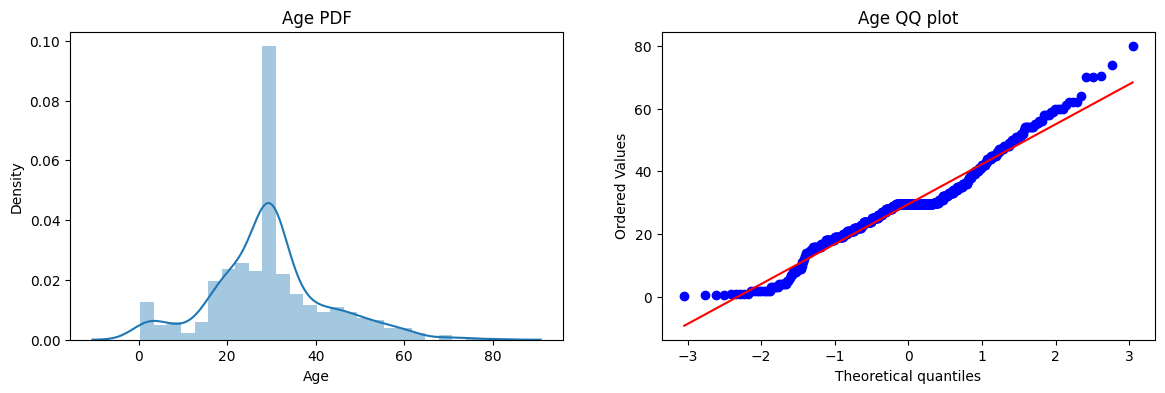

In [9]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(X_train['Age'])
plt.title('Age PDF')

plt.subplot(122)
stats.probplot(X_train['Age'], dist ='norm',plot = plt)
plt.title('Age QQ plot')
plt.show()

<ipython-input-10-92b7d017892e>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['Fare'])


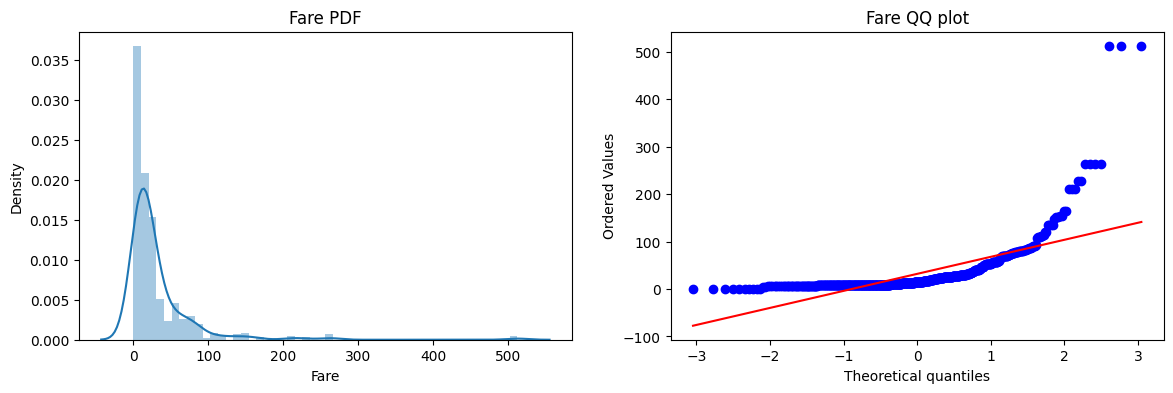

In [10]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(X_train['Fare'])
plt.title('Fare PDF')

plt.subplot(122)
stats.probplot(X_train['Fare'], dist ='norm',plot = plt)
plt.title('Fare QQ plot')
plt.show()

In [11]:
clf = LogisticRegression()
clf.fit(X_train,y_train)
clf2 = DecisionTreeClassifier()
clf2.fit(X_train,y_train)

DecisionTreeClassifier()

In [12]:
y_pred = clf.predict(X_test)
y_pred2 = clf2.predict(X_test)

In [13]:
print("LR",accuracy_score(y_test,y_pred))
print("DT",accuracy_score(y_test,y_pred2))

LR 0.6576271186440678
DT 0.6474576271186441


# **log Transform using because of data is rightly skewed**

In [14]:
trf = FunctionTransformer(func=np.log1p)
X_train_transformed = trf.fit_transform(X_train)
X_test_transformed = trf.transform(X_test)

In [15]:
clf = LogisticRegression()
clf.fit(X_train_transformed,y_train)
clf2 = DecisionTreeClassifier()
clf2.fit(X_train_transformed,y_train)

DecisionTreeClassifier()

In [16]:
y_pred = clf.predict(X_test_transformed)
y_pred2 = clf2.predict(X_test_transformed)

In [17]:
print("LR",accuracy_score(y_test,y_pred))
print("DT",accuracy_score(y_test,y_pred2))

LR 0.6847457627118644
DT 0.6440677966101694


# **Using Cross Validation**

In [18]:
X_transformed = trf.fit_transform(X)
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

In [19]:
print("LR",np.mean(cross_val_score(clf,X_transformed,y,cv=5).mean()))
print("DT",np.mean(cross_val_score(clf2,X_transformed,y,cv=10).mean()))


LR 0.6780114242671521
DT 0.6633458177278402


# **Fare plot**

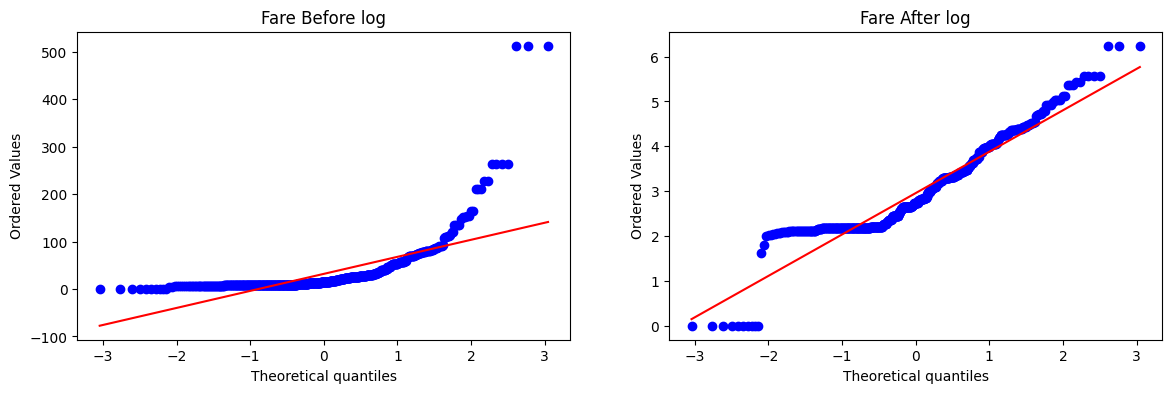

In [20]:
plt.figure(figsize=(14,4))
plt.subplot(121)
stats.probplot(X_train['Fare'],dist = 'norm',plot = plt)
plt.title('Fare Before log')

plt.subplot(122)
stats.probplot(X_train_transformed['Fare'], dist ='norm',plot = plt)
plt.title('Fare After log')
plt.show()

# **Age**

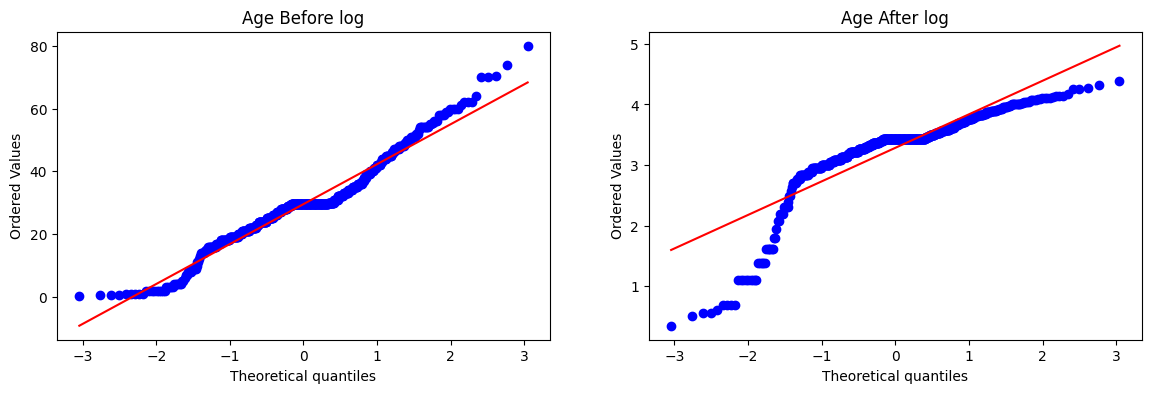

In [21]:
plt.figure(figsize=(14,4))
plt.subplot(121)
stats.probplot(X_train['Age'],dist = 'norm',plot = plt)
plt.title('Age Before log')

plt.subplot(122)
stats.probplot(X_train_transformed['Age'], dist ='norm',plot = plt)
plt.title('Age After log')
plt.show()

# **Skip the Age only using Fare**

In [22]:
trf2 = ColumnTransformer([('Log',FunctionTransformer(np.log1p),['Fare'])],remainder = 'passthrough')

X_train_transformed2 = trf2.fit_transform(X_train)
X_test_transformed2 = trf2.transform(X_test)

In [23]:
clf = LogisticRegression()
clf.fit(X_train_transformed2,y_train)
clf2 = DecisionTreeClassifier()
clf2.fit(X_train_transformed2,y_train)

DecisionTreeClassifier()

In [ ]:
y_pred = clf.predict(X_test_transformed2)
y_pred2 = clf2.predict(X_test_transformed2)

In [ ]:
print("LR",accuracy_score(y_test,y_pred))
print("DT",accuracy_score(y_test,y_pred2))

LR 0.6711864406779661
DT 0.6169491525423729


# **Check cross Validation**

In [ ]:
X_transformed2 = trf2.fit_transform(X)
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

In [ ]:
print("LR",np.mean(cross_val_score(clf,X_transformed2,y,scoring = 'accuracy',cv=5)))
print("DT",np.mean(cross_val_score(clf2,X_transformed2,y,scoring = 'accuracy',cv=5)))

LR 0.6712635741635804
DT 0.6453581068357291


# **Another Transform**

In [35]:
import numpy as np
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression



# Sample transform function
transform = FunctionTransformer(np.log1p, validate=True)

# Define the column transformer
trf = ColumnTransformer([('Log', transform, ['Fare'])], remainder='passthrough')

# Assuming df is defined, and has a 'Fare' column
X = df.iloc[:,1:3]
y = df.iloc[:,0]

# Transform X
X_trans = trf.fit_transform(X)

# Fit a model (example)
clf = LogisticRegression()
clf.fit(X_trans, y)
print('Accuracy',np.mean(cross_val_score(clf,X_trans,y,scoring = 'accuracy',cv=5)))



Accuracy 0.6712635741635804


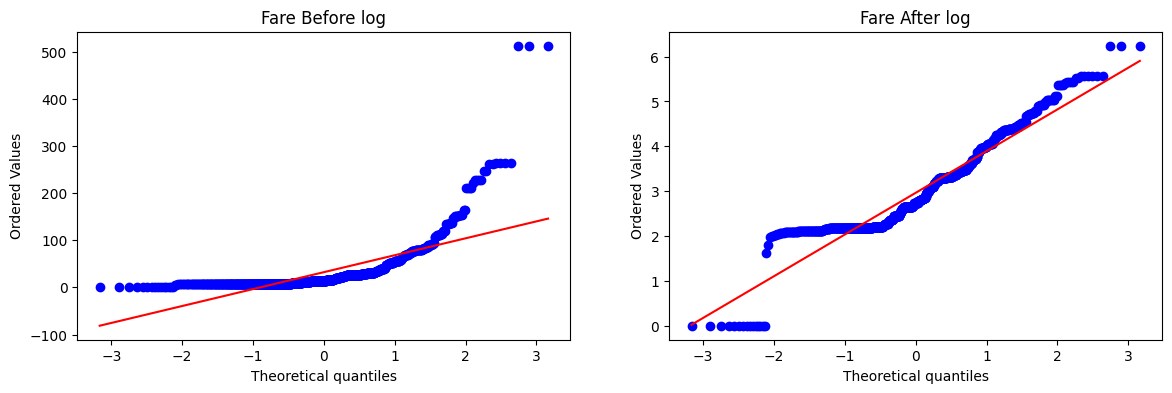

In [36]:
plt.figure(figsize=(14,4))
plt.subplot(121)
stats.probplot(X['Fare'],dist = 'norm',plot = plt)
plt.title('Fare Before log')
plt.subplot(122)
stats.probplot(X_trans[:,0], dist ='norm',plot = plt)
plt.title('Fare After log')
plt.show()


# **without transform**

In [37]:
apply_transform(lambda x:x)
print('Accuracy',np.mean(cross_val_score(clf,X_trans,y,scoring = 'accuracy',cv=5)))

Accuracy 0.6712635741635804


# **With transform X^2**

In [38]:
apply_transform(lambda x:x**2)
print('Accuracy',np.mean(cross_val_score(clf,X_trans,y,scoring = 'accuracy',cv=5)))

Accuracy 0.6712635741635804
